# Рубежный контроль №1
# Тема: Технологии разведочного анализа и обработки данных

## Зубарева А. М. ИУ5-65Б Вариант 7

Загрузка необходимых библиотек:

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

In [31]:
data = pd.read_csv('./datasets/Admission_Predict.csv')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
 9   target             400 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 31.4 KB


In [33]:
data.shape

(400, 10)

(строк, колонок)

In [34]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,target
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.65


In [ ]:
Нас интересует значение Chance of Admit для построения нашей модели

In [35]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
target               float64
dtype: object

Все значения числовые

Проверим наличие пропусков

In [36]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
target               0
dtype: int64

Здесь видно, что пропусков в данных нет ни в одном столбце

In [37]:
data['Chance of Admit '].value_counts()

0.64    17
0.71    16
0.72    15
0.73    13
0.94    12
0.79    12
0.76    12
0.70    12
0.78    12
0.74    11
0.80    11
0.68    10
0.93     9
0.84     9
0.89     9
0.65     9
0.62     9
0.82     8
0.86     8
0.75     8
0.90     8
0.57     8
0.81     8
0.77     8
0.91     7
0.69     7
0.96     7
0.66     7
0.61     7
0.67     7
0.85     6
0.63     6
0.56     6
0.92     6
0.58     5
0.46     5
0.87     5
0.54     5
0.52     5
0.47     5
0.59     4
0.49     4
0.97     4
0.88     4
0.95     4
0.53     3
0.48     3
0.44     3
0.42     3
0.83     3
0.38     2
0.34     2
0.36     2
0.45     2
0.50     2
0.43     1
0.51     1
0.55     1
0.60     1
0.39     1
Name: Chance of Admit , dtype: int64

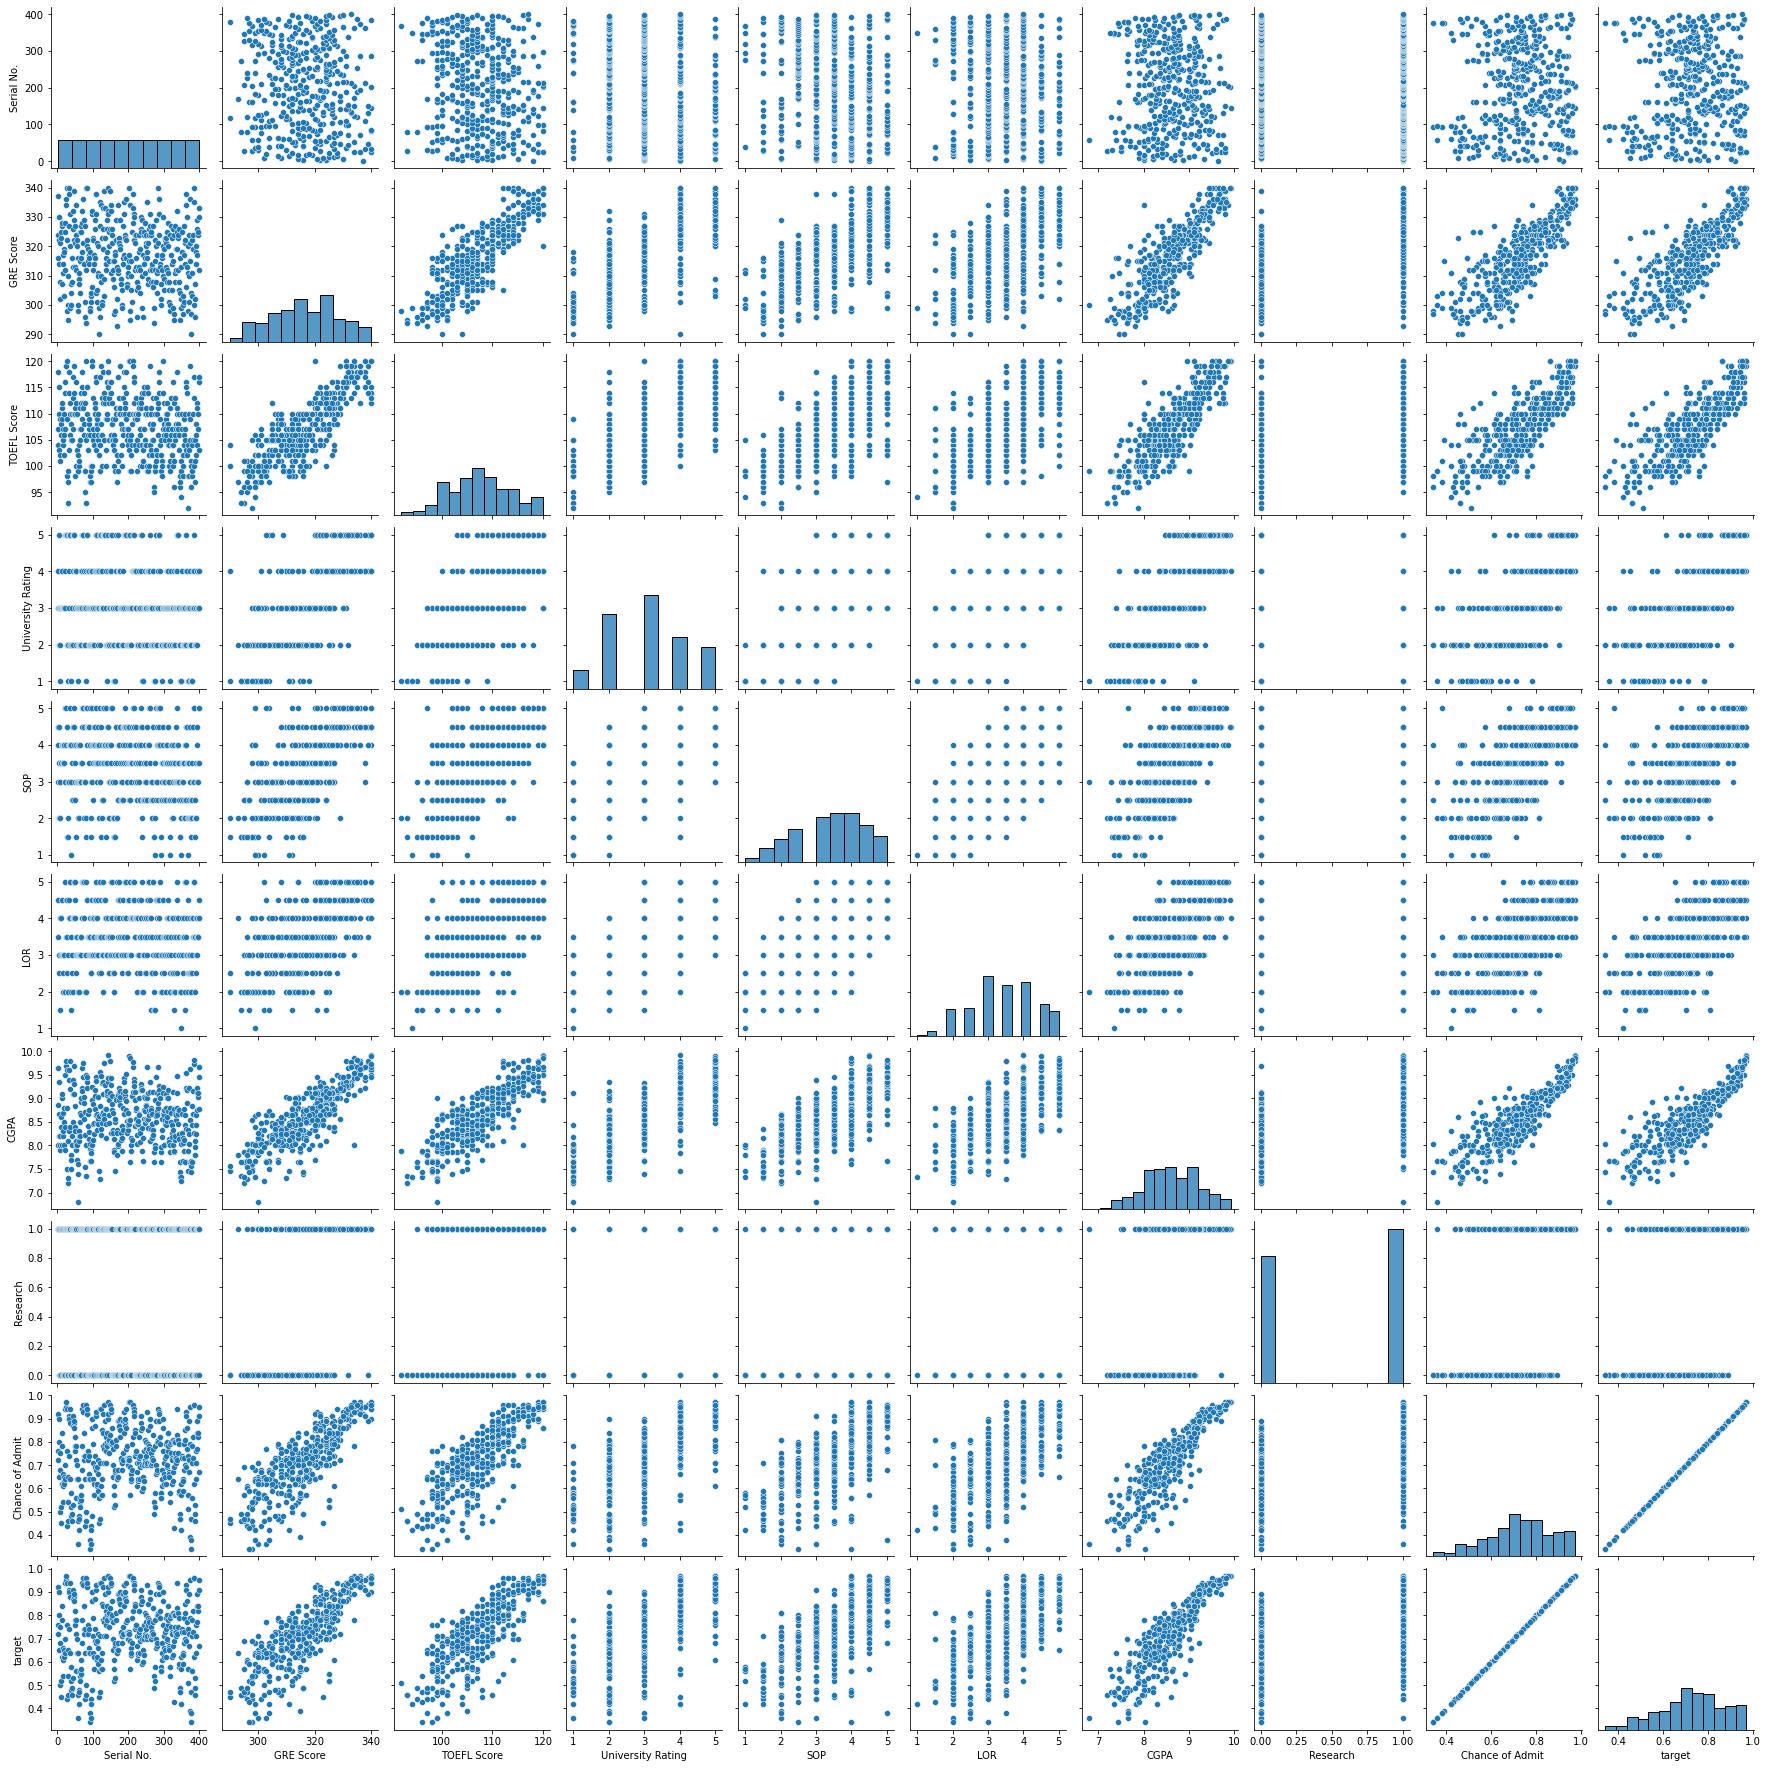

In [38]:
sns.pairplot(data)

Построили pairplot, здесь уже можно увидеть корреляцию полей

In [39]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,target
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000,1.000000
target,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000,1.000000


Построим heatmap для лучшего визуального представления всех корреляций

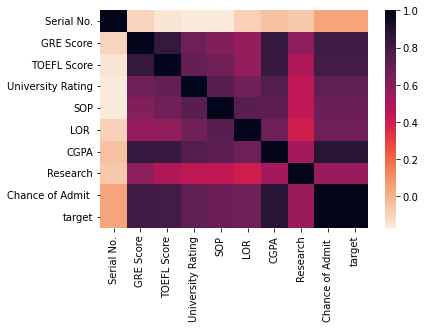

In [40]:
cmap = sns.cm.rocket_r
ax = sns.heatmap(data.corr(), cmap=cmap)

Наиболее интересно для построения модели как коррелируют все поля с Chance of admit. \
Видим, что у нас наиболее влиятельные - поля CGPA, GRE Score и TOEFL Score. Соответственно, они должны вносить наибольший вклад в итоговую модель

До построения модели необходимо нормализировать поля, так как все они числовые, и находятся порой в разных диапазонах (GRE score имеет значения порядка 300, а CGPA - порядка 10)

In [21]:
normalized_data = preprocessing.normalize(data)

In [42]:
normalized_data = preprocessing.normalize(data.loc[:, data.columns!='Chance of Admit '])
target = data['Chance of Admit ']